In [35]:
import pandas as pd

df = pd.read_json('annotated_data/our_mutual_friend_dr_s_annotations.jsonl', lines=True)

In [36]:
import sklearn
from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import transformers
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [37]:
model = AutoModelForTokenClassification.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
tokenizer = AutoTokenizer.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
metaphor_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def count_label_1(entities):
        count = 0
        for entity in entities:
            if entity['entity_group'] == 'LABEL_1':
                count += 1
        return count

In [38]:
df.head()

,annotator,sentence_number,text,label
0,dr_s,1,"In these times of ours, though concerning the ...",m
1,dr_s,2,The figures in this boat were those of a stron...,l
2,dr_s,3,"The girl rowed, pulling a pair of sculls very ...",l
3,dr_s,4,"He had no net, hook, or line, and he could not...",l
4,dr_s,5,"The tide, which had turned an hour before, was...",l


In [39]:
df['annotator'] = "model"

In [40]:
df.drop(columns='label', inplace=True)

In [41]:
df.head()

,annotator,sentence_number,text
0,model,1,"In these times of ours, though concerning the ..."
1,model,2,The figures in this boat were those of a stron...
2,model,3,"The girl rowed, pulling a pair of sculls very ..."
3,model,4,"He had no net, hook, or line, and he could not..."
4,model,5,"The tide, which had turned an hour before, was..."


In [42]:
df['model_entities'] = df['text'].apply(lambda x: metaphor_pipeline(x))
df['label'] = df['model_entities'].apply(count_label_1).apply(lambda x: 'm' if x > 0 else 'l')
df.head()

,annotator,sentence_number,text,model_entities,label
0,model,1,"In these times of ours, though concerning the ...","[{'entity_group': 'LABEL_1', 'score': 0.999911...",m
1,model,2,The figures in this boat were those of a stron...,"[{'entity_group': 'LABEL_0', 'score': 0.999963...",m
2,model,3,"The girl rowed, pulling a pair of sculls very ...","[{'entity_group': 'LABEL_0', 'score': 0.999653...",m
3,model,4,"He had no net, hook, or line, and he could not...","[{'entity_group': 'LABEL_0', 'score': 0.997913...",m
4,model,5,"The tide, which had turned an hour before, was...","[{'entity_group': 'LABEL_0', 'score': 0.999087...",m


<AxesSubplot:>

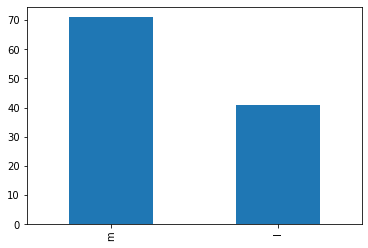

In [43]:
df['label'].value_counts().plot(kind='bar')

In [44]:
print(pd.__version__)

1.4.2


In [52]:
df.to_json('our_mutual_friend_model_annotations.json', orient='records', lines=True)

In [47]:
with open('annotated_data/our_mutual_friend_model_annotations.jsonl') as f:
    lines = f.readlines()

with open("annotated_data/our_mutual_friend_model_annotations.jsonl", 'w') as f:
    for line in lines:
        f.write(line + '\n')

In [48]:
dr_s_df = pd.read_json('annotated_data/our_mutual_friend_dr_s_annotations.jsonl', lines=True)
combined_df = pd.concat([df, dr_s_df])
combined_df = combined_df.rename(columns={'label': 'annotator_label'})
combined_df.head()

,annotator,sentence_number,text,model_entities,annotator_label
0,model,1,"In these times of ours, though concerning the ...","[{'entity_group': 'LABEL_1', 'score': 0.999911...",m
1,model,2,The figures in this boat were those of a stron...,"[{'entity_group': 'LABEL_0', 'score': 0.999963...",m
2,model,3,"The girl rowed, pulling a pair of sculls very ...","[{'entity_group': 'LABEL_0', 'score': 0.999653...",m
3,model,4,"He had no net, hook, or line, and he could not...","[{'entity_group': 'LABEL_0', 'score': 0.997913...",m
4,model,5,"The tide, which had turned an hour before, was...","[{'entity_group': 'LABEL_0', 'score': 0.999087...",m


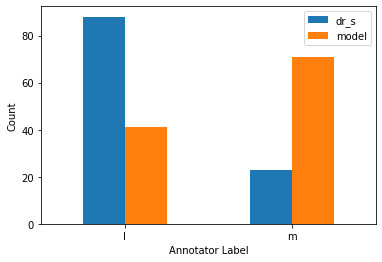

In [50]:
# group by 'annotator' and 'annotator_label' columns and count the occurrences of each label
grouped = combined_df.groupby(['annotator', 'annotator_label']).size().reset_index(name='counts')

# pivot the data so that each annotator is a column
pivoted = grouped.pivot(index='annotator_label', columns='annotator', values='counts')

# create a bar plot
pivoted.plot.bar()

# add x and y labels
plt.xlabel('Annotator Label')
plt.xticks(rotation = 360)
plt.ylabel('Count')
plt.legend(loc='best')

# show plot
plt.show()
